<a href="https://colab.research.google.com/github/sairajesh919/netflix-analysis/blob/main/netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None

Missing values per column:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration       

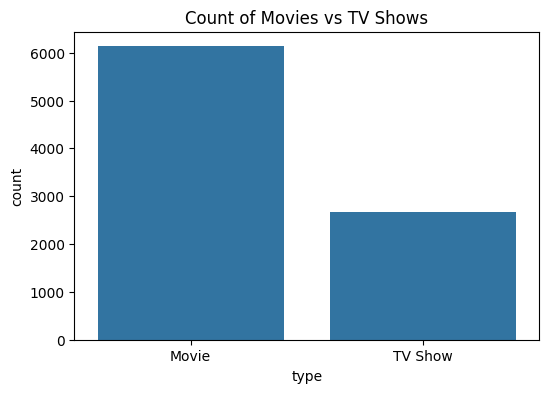

/tmp/ipython-input-1191955443.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='year_added', palette='viridis')


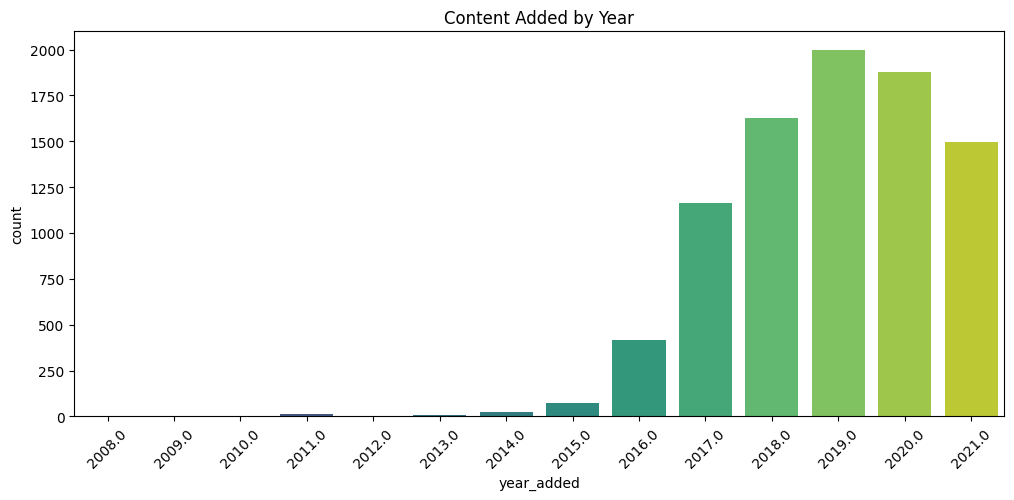

/tmp/ipython-input-1191955443.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


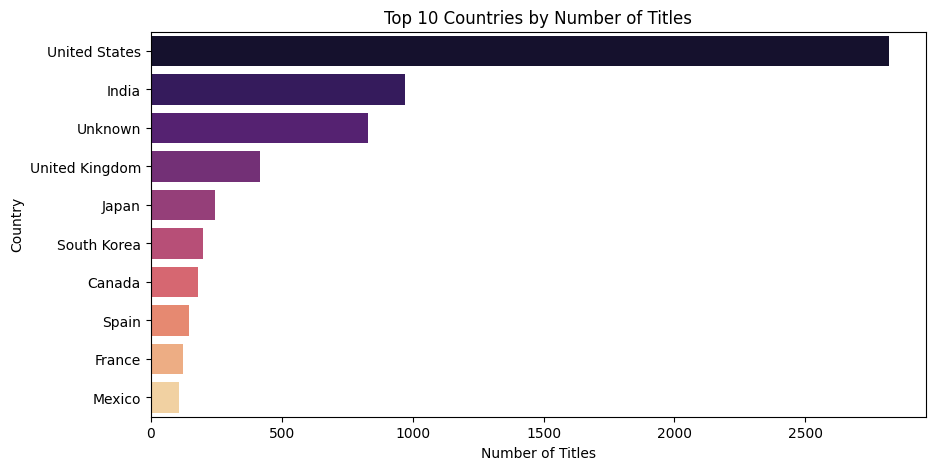

/tmp/ipython-input-1191955443.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


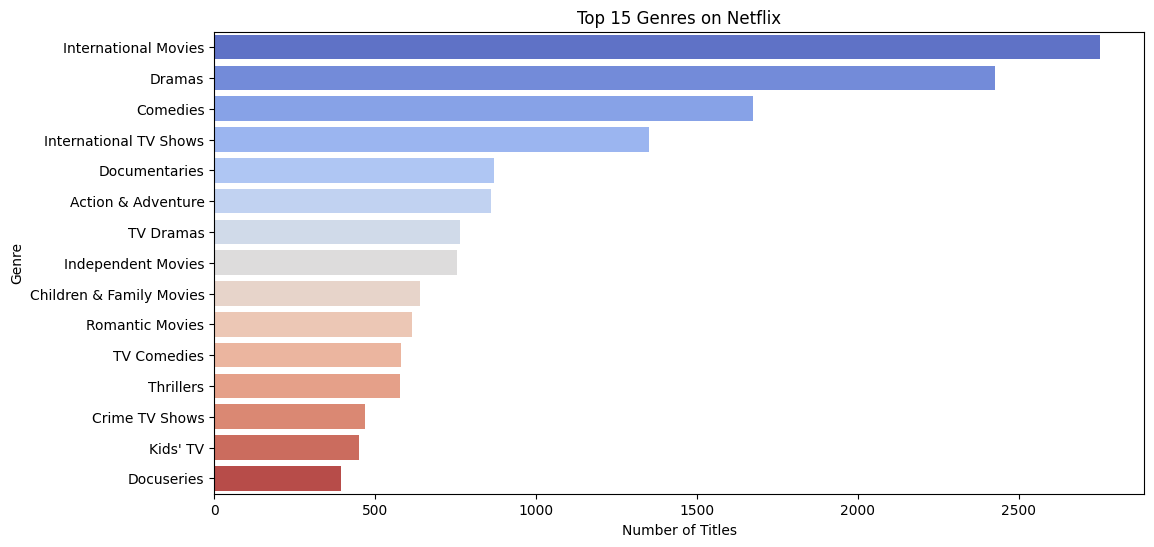

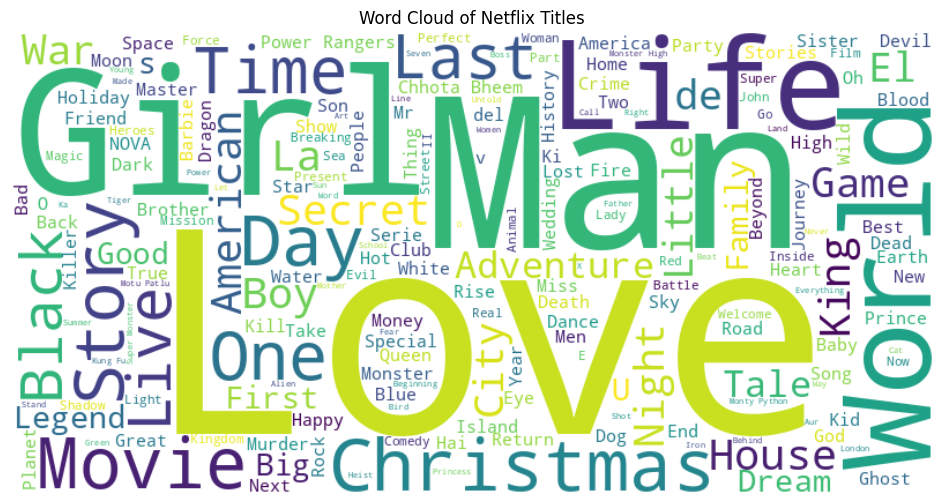

In [2]:
# Netflix Movies and TV Shows Analysis - Starter Script

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Show first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Basic info and missing values
print("\nDataset info:")
print(df.info())
print("\nMissing values per column:")
print(df.isnull().sum())

# Convert 'date_added' to datetime, coercing errors
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Fill missing values in 'country' and 'director' with 'Unknown'
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('Unknown')

# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title('Count of Movies vs TV Shows')
plt.show()

# Distribution of content added per year
df['year_added'] = df['date_added'].dt.year
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='year_added', palette='viridis')
plt.title('Content Added by Year')
plt.xticks(rotation=45)
plt.show()

# Top 10 countries producing content
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

# Analyzing genres - split the 'listed_in' column by comma and explode
df_genres = df.copy()
df_genres['listed_in'] = df_genres['listed_in'].str.split(', ')
df_genres = df_genres.explode('listed_in')

plt.figure(figsize=(12,6))
genre_counts = df_genres['listed_in'].value_counts().head(15)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# Word Cloud of Titles
plt.figure(figsize=(12,6))
text = ' '.join(df['title'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Netflix Titles')
plt.show()